# Projeto 1: *support vector machines*

Professora: Esther Colombini -- esther@ic.unicamp.br

Monitores: Jesus Paucar -- j236865@dac.unicamp.br

Este *notebook* faz parte da disciplina INF-0616 no curso de extensão MDC.  
Demais artefatos podem ser encontrados no moodle da disciplina:
[moodle.lab.ic.unicamp.br/680](https://moodle.ic.unicamp.br/moodle/course/view.php?id=680)

Instituto de Computação - Unicamp 2025

In [1]:
from __future__ import print_function

from math import ceil

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV

import seaborn as sns

from IPython.display import display, Image

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(1082141)
sns.set()

## Classificando imagens de dígitos
### Lendo o conjunto de dados

**Pen-Based Recognition of Handwritten Digits Data Set**
é um banco de imagens simples e bem conhecido em reconhecimento de imagens.  
Ele é composto por imagens em escala cinza de 8 por 8 pixels divididas em 10 classes de dígitos.

Uma descrição completa pode ser encontrada no seguinte link: [archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)

In [3]:
x, y = datasets.load_digits(return_X_y=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.5,
                                                    random_state=183212)
print('amostras em treino: %i' % x_train.shape[0],
      'amostras em teste: %i' % x_test.shape[0],
      'número de características: %i' % x_train.shape[1],
      'número de classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')

amostras em treino: 898
amostras em teste: 899
número de características: 64
número de classes: 10



### 64 primeiras amostras no conjunto de treinamento

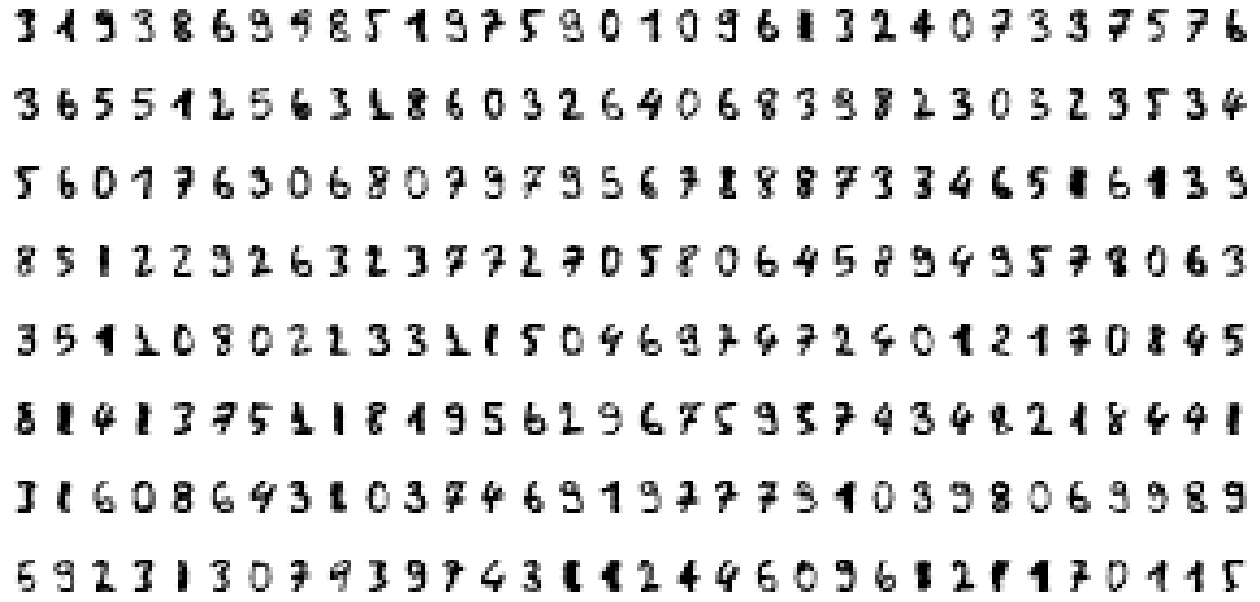

In [4]:
plt.figure(figsize=(16, 8))

for ix in range(8  * 32):
    plt.subplot(8, 32, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

### Visualizando o conjunto e frequências das classes

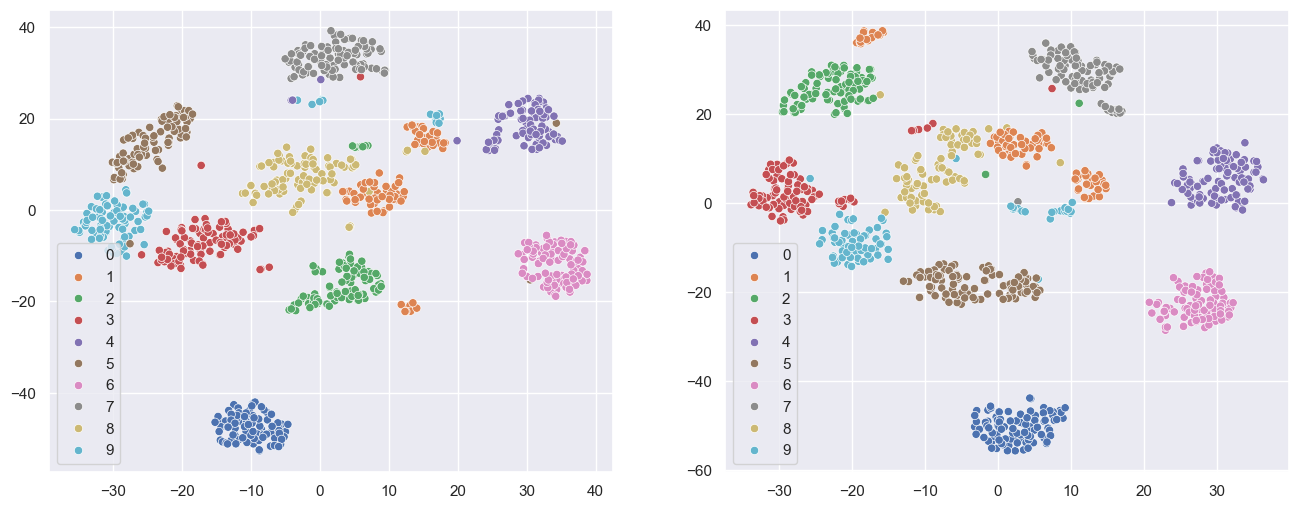

In [5]:
from sklearn.manifold import TSNE

encoder2D = TSNE()
w_train = encoder2D.fit_transform(x_train)
w_test = encoder2D.fit_transform(x_test)

plt.figure(figsize=(16, 6))
categorical_colors = sns.color_palette()

for ix, (x, y) in enumerate(((w_train, y_train), (w_test, y_test))):
    plt.subplot(1, 2, ix + 1)
    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, palette=categorical_colors);

<Axes: title={'center': 'Frequencia das classes no conjunto de teste (899 amostras)'}>

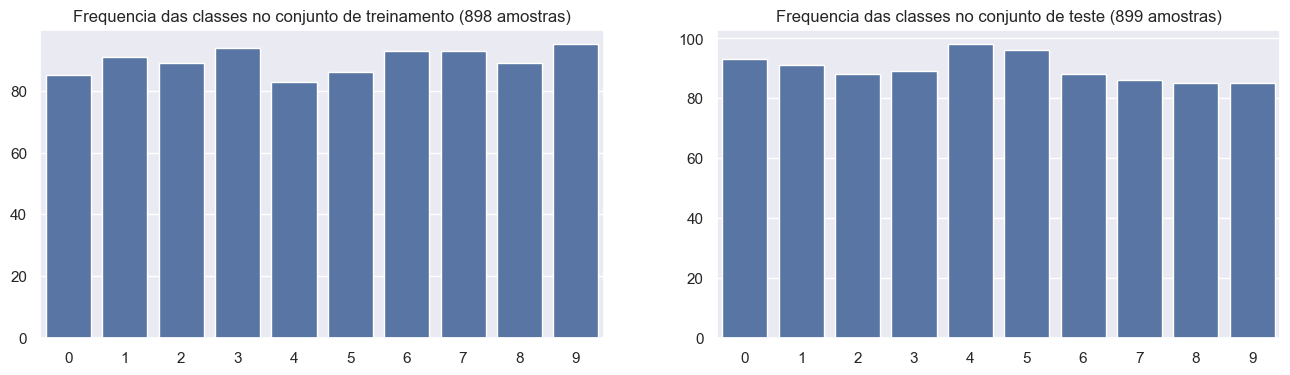

In [6]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title('Frequencia das classes no conjunto de treinamento (%i amostras)' % len(x_train))
labels, counts = np.unique(y_train, return_counts=True)
sns.barplot(x=labels, y=counts)

plt.subplot(122)
plt.title('Frequencia das classes no conjunto de teste (%i amostras)' % len(x_test))
labels, counts = np.unique(y_test, return_counts=True)
sns.barplot(x=labels, y=counts)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

### Modelando um classificador de digitos

**Atividade (3 pts):** defina e treine uma máquina de vetor de suporte com diferentes tipos de kernel, utilizando o scikit-learn. Avalie os diversos tipos de kernel e seus respectivos parâmetros com relação a qualidade da solução. Você deve separar uma parte do conjunto de treino para fazer a validação cruzada. Não utilize o conjunto de teste ainda.

In [8]:
pipe = Pipeline([
    # ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = [
    {'svc__kernel': ['linear'], 'svc__C': [0.1, 1, 10]},
    {'svc__kernel': ['poly'], 'svc__C': [0.1, 1, 10], 'svc__degree': [2, 3, 4]},
    {'svc__kernel': ['rbf'], 'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 0.01, 0.1, 1]},
    {'svc__kernel': ['sigmoid'], 'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 0.01, 0.1, 1]},
]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid.fit(x_train, y_train)

print("Melhores parâmetros encontrados:")
print(grid.best_params_)
print("\nAcurácia média de validação cruzada: %.4f" % grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Melhores parâmetros encontrados:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

Acurácia média de validação cruzada: 0.9867


**Resposta:**
Foi executado um grid search a fim de se determinar qual o melhor conjunto de parâmetros para o treinamento da SVM.
Após a execução notamos que o melhor kernel foi o RBF, utilizando um C igual a 10 e um valor de gamma de 0,01. O modelo que performou melhor tem uma fronteira de decisão suave de dados e o valor relativamente pequeno de gamma indica que não há risco de overfitting nem de baixa capacidade de generalização.
Vale destacar que o treinamento do modelo foi realizado sem a normalização dos dados. Ao normalizar notamos uma leve queda na acurácia, de 0,9867 para 0,9800.

### Avaliando o modelo treinado

**Atividade (2 pts):** avalie o seu melhor modelo treinado no item anterior sobre o conjunto de teste previamente separado. Reporte a acurácia média, a matriz de confusão e outras métricas que achar válido.

Acurácia no conjunto de teste: 0.9867


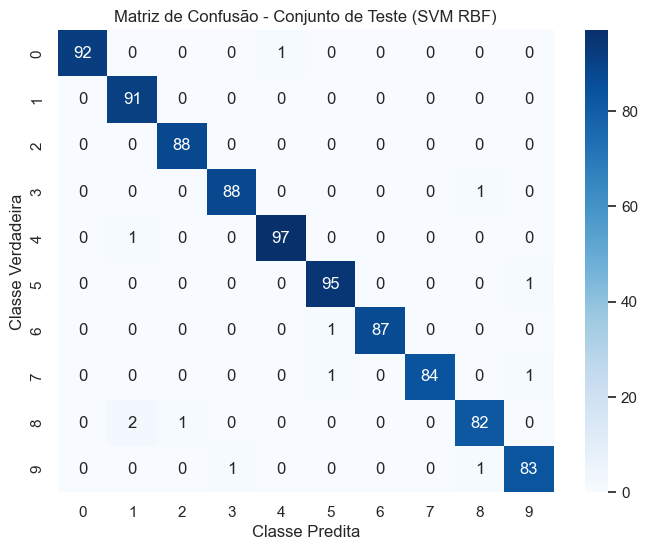


Relatório de Classificação:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        93
           1       0.97      1.00      0.98        91
           2       0.99      1.00      0.99        88
           3       0.99      0.99      0.99        89
           4       0.99      0.99      0.99        98
           5       0.98      0.99      0.98        96
           6       1.00      0.99      0.99        88
           7       1.00      0.98      0.99        86
           8       0.98      0.96      0.97        85
           9       0.98      0.98      0.98        85

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



In [9]:
# Avaliação no conjunto de teste
y_pred = grid.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {acc:.4f}")

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Conjunto de Teste (SVM RBF)")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


**Resposta:**
Conforme observado acima, o conjunto de paramêtros para o teste da SVM obteve 0,9867 de acurácia. No conjunto de treinamento tivemos uma acurácia exatamente igual. Apesar do valor igual entre treino e teste, não podemos afirmar que o modelo está super ajustado aos dados de treinamento, ou seja, que ocorreu overfitting. Além disso, o valor obtido de acurácia é bastante alto e está dentro do range de valores de modelos baseline divulgado no site da base de dados (https://archive.ics.uci.edu/dataset/81/pen+based+recognition+of+handwritten+digits), que admite valores entre 0,9771 e 0,9859.

Observando a matriz de confusão dos resultados, possível notar que somente 12 caracteres dos 898 foram classificados de forma errada.

**Atividade (4 pts):** treine dois ou mais classificadores (Random forest, logistic regression, etc.) e reporte o suas respectivas métricas sobre as porções de validação separadas (acurácia, acurácia balanceada, precision, etc). Compare seus melhores classificadores com os resultados da SVM no conjunto de teste.



**Random Forest:**

In [10]:
# Modelo base
rf = RandomForestClassifier(random_state=42)

# Grid de hiperparâmetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],      # número de árvores
    'max_depth': [None, 10, 20],         # profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],     # mínimo de amostras para dividir nó
    'min_samples_leaf': [1, 2, 4],       # mínimo de amostras em folha
    'bootstrap': [True, False]           # amostragem com substituição
}

grid_rf = GridSearchCV(estimator=rf,
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
grid_rf.fit(x_train, y_train)

print("Melhores parâmetros Random Forest:", grid_rf.best_params_)
print("Melhor acurácia na validação:", grid_rf.best_score_)


Melhores parâmetros Random Forest: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Melhor acurácia na validação: 0.9788454376163873


Avaliando a performance no conjunto de teste:

In [12]:
y_test_rf = grid_rf.predict(x_test)
print("### Random Forest ###")
print("Acurácia:", accuracy_score(y_test, y_test_rf))
print("\nRelatório de classificação:\n")
print(classification_report(y_test, y_test_rf))

### Random Forest ###
Acurácia: 0.9733036707452726

Relatório de classificação:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        93
           1       0.98      1.00      0.99        91
           2       0.99      1.00      0.99        88
           3       0.98      0.97      0.97        89
           4       0.96      0.99      0.97        98
           5       0.99      0.98      0.98        96
           6       0.99      0.97      0.98        88
           7       0.98      0.94      0.96        86
           8       0.95      0.95      0.95        85
           9       0.94      0.95      0.95        85

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



**Regressão logística:**

In [13]:
# Pipeline para normalizar os dados (LR é sensível à escala)
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=42))
])

# Grid de hiperparâmetros
param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10],       # força da regularização inversa
    'lr__penalty': ['l2'],             # regularização L2 (padrão)
    'lr__solver': ['lbfgs']            # solver adequado para multiclasses
}

grid_lr = GridSearchCV(estimator=pipe_lr,
                       param_grid=param_grid_lr,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1)
grid_lr.fit(x_train, y_train)

print("Melhores parâmetros Logistic Regression:", grid_lr.best_params_)
print("Melhor acurácia na validação:", grid_lr.best_score_)


Melhores parâmetros Logistic Regression: {'lr__C': 10, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Melhor acurácia na validação: 0.95544382371198


d:\Unicamp\compartilhado\UnicampMDC2025\Supervisionado2\trabalhos\trabalho1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Avaliando a performance no conjunto de teste:

In [15]:
y_test_lr = grid_lr.predict(x_test)
print("### Logistic Regression ###")
print("Acurácia:", accuracy_score(y_test, y_test_lr))
print("\nRelatório de classificação:\n")
print(classification_report(y_test, y_test_lr))

### Logistic Regression ###
Acurácia: 0.9543937708565072

Relatório de classificação:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        93
           1       0.91      0.98      0.94        91
           2       0.95      0.99      0.97        88
           3       0.93      0.94      0.94        89
           4       0.96      0.99      0.97        98
           5       0.96      0.94      0.95        96
           6       0.98      0.95      0.97        88
           7       0.98      0.94      0.96        86
           8       0.91      0.93      0.92        85
           9       0.99      0.91      0.94        85

    accuracy                           0.95       899
   macro avg       0.96      0.95      0.95       899
weighted avg       0.96      0.95      0.95       899



**Pergunta (1pt):** qual classificador apresentou os melhores resultados? Qual critério você utilizou para definir sua escolha? Discuta.

In [16]:
print("### SVM RBF ###")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("#################################")
print("### Logistic Regression ###")
print("Acurácia:", accuracy_score(y_test, y_test_lr))
print(classification_report(y_test, y_test_lr))
print("#################################")
print("### Random Forest ###")
print("Acurácia:", accuracy_score(y_test, y_test_rf))
print(classification_report(y_test, y_test_rf))

### SVM RBF ###
Acurácia: 0.9866518353726362
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        93
           1       0.97      1.00      0.98        91
           2       0.99      1.00      0.99        88
           3       0.99      0.99      0.99        89
           4       0.99      0.99      0.99        98
           5       0.98      0.99      0.98        96
           6       1.00      0.99      0.99        88
           7       1.00      0.98      0.99        86
           8       0.98      0.96      0.97        85
           9       0.98      0.98      0.98        85

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899

#################################
### Logistic Regression ###
Acurácia: 0.9543937708565072
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       

**Resposta:**
Acima temos os resultados para o melhor conjunto de parâmetros encontrados no grid search para três modelos diferentes: SVM, Random Forest e o de Regressão Logística. Vamos compará-los em termos de acurácia, pois estamos interessados em analisar a capacidade do modelo em ser assertivo. Além disso, como foi analisado anteriormente, não temos problemas de desbalanceamento de classes, o que poderia nos direcionar ao uso de outro indicador de performance.
Para os dados de teste, a performance de cada um dos modelos, em termos de acurácia, foi a seguinte:
SVM: 0,99;
Random Forest: 0,97;
Regressão Logística: 0,95.

Podemos notar que o SVM performou melhor que os demais. Esse comportamento bate exatamente com o que é relatado no site do nosso dataset (que pode ser visto abaixo). Assim como no site, o SVM foi o melhor modelo, seguido do Random Forest e por último o de Regressão logística.

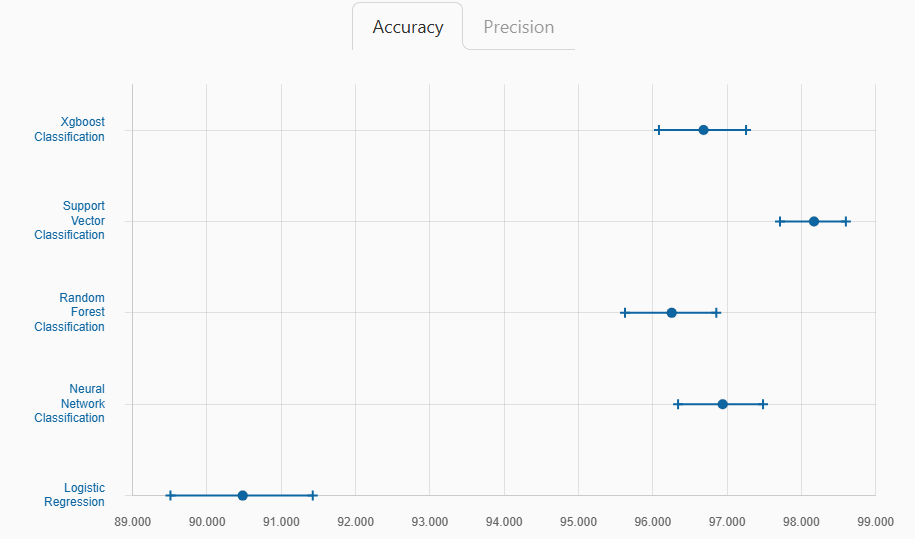

In [17]:
display(Image('PerformanceBenchmark.png'))